# <font color='red'>1 - </font> Getting Data

In [2]:
path = "../dataset/data/"

In [65]:
import pandas as pd
import glob

for file_path in glob.glob(path + "*.csv"):
    print(file_path)

df = pd.read_csv("../dataset/data/dataset-tickets-multi-lang3-4k.csv")

df = df.fillna('')

df.head()


../dataset/data/aa_dataset-tickets-multi-lang-5-2-50-version.csv
../dataset/data/dataset-tickets-german_normalized.csv
../dataset/data/dataset-tickets-german_normalized_50_5_2.csv
../dataset/data/dataset-tickets-multi-lang-4-20k.csv
../dataset/data/dataset-tickets-multi-lang3-4k.csv


,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,Problema crítico del servidor requiere atenció...,Es necesaria una investigación inmediata sobre...,Estamos investigando urgentemente el problema ...,Incident,Technical Support,high,es,IT Services,Urgent Issue,Service Disruption,Incident Report,Service Recovery,System Maintenance,,,,
1,Anfrage zur Verfügbarkeit des Dell XPS 13 9310,"Sehr geehrter Kundenservice,\n\nich hoffe, die...","Sehr geehrter <name>,\n\nvielen Dank, dass Sie...",Request,Customer Service,low,de,Tech Online Store,Sales Inquiry,Product Support,Customer Service,Order Issue,Returns and Exchanges,,,,
2,Erro na Autocompletação de Código do IntelliJ ...,"Prezado Suporte ao Cliente <name>,\n\nEstou es...","Prezado <name>,\n\nObrigado por entrar em cont...",Incident,Technical Support,high,pt,IT Services,Technical Support,Software Bug,Problem Resolution,Urgent Issue,IT Support,,,,
3,Urgent Assistance Required: AWS Service,"Dear IT Services Support Team, \n\nI am reachi...","Dear <name>,\n\nThank you for reaching out reg...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,,
4,Problème d'affichage de MacBook Air,Cher équipe de support du magasin en ligne Tec...,"Cher <name>,\n\nMerci de nous avoir contactés ...",Incident,Product Support,low,fr,Tech Online Store,Technical Support,Product Support,Hardware Failure,Service Recovery,Routine Request,,,,


# <font color='red'>2 - </font> Embedding Both Ticket Body and Answer

In [4]:
X = df["body"].values.astype(str)
y = df["answer"].values.astype(str)

In [5]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-mpnet-base-v2')
embeddings = model.encode(X)

In [43]:
from sklearn.model_selection import train_test_split

train_idx, test_idx = train_test_split(np.arange(len(X)), random_state=42)

In [46]:
X_train, X_test, y_train, y_test = embeddings[train_idx], embeddings[test_idx], y[train_idx], y[test_idx]

In [57]:
sample_id = 4

print(X[test_idx[sample_id]])

Cher service client,

J'espère que ce message vous trouve en bonne santé. Je vous écris pour demander une mise à niveau de nos licences Google Workspace pour l'équipe de vente afin d'améliorer leur productivité et leurs capacités de collaboration. Actuellement, nous utilisons l'édition Business Standard, et une transition vers un plan plus avancé serait très bénéfique pour notre équipe. Veuillez nous faire savoir les procédures et les coûts associés à cette mise à niveau.

Merci pour votre assistance.

Cordialement,

<name>


In [58]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(X_train, [X_test[sample_id]])

In [60]:
import numpy as np

df_topk = pd.DataFrame({
    "ticket_id" : np.arange(len(similarity_matrix)).tolist(),
    "similarity" : similarity_matrix.reshape(-1)
    }).sort_values('similarity', ascending=False)

Text(0.5, 0, 'Similarity')

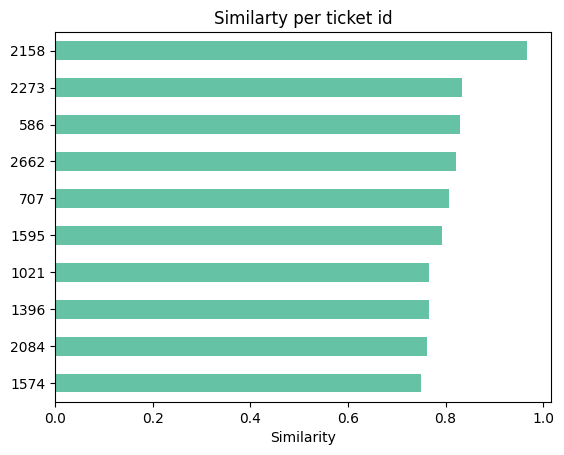

In [61]:
top_10 = df_topk.head(10)

counts = top_10['similarity'].sort_values(ascending=True)
counts.plot(kind="barh", stacked=True, colormap="Set2")
plt.title("Similarty per ticket id")
plt.xlabel("Similarity")

In [64]:
print(X[test_idx[4]], y[train_idx[2158]], y[train_idx[2273]])

Cher service client,

J'espère que ce message vous trouve en bonne santé. Je vous écris pour demander une mise à niveau de nos licences Google Workspace pour l'équipe de vente afin d'améliorer leur productivité et leurs capacités de collaboration. Actuellement, nous utilisons l'édition Business Standard, et une transition vers un plan plus avancé serait très bénéfique pour notre équipe. Veuillez nous faire savoir les procédures et les coûts associés à cette mise à niveau.

Merci pour votre assistance.

Cordialement,

<name> Estimado/a <name>,

Gracias por ponerse en contacto con respecto a la actualización de sus licencias de Google Workspace. Para actualizar de Business Standard a un plan más avanzado, puede considerar opciones como Business Plus, Enterprise Standard o Enterprise Plus. Estos planes ofrecen funciones mejoradas para la colaboración y la productividad.

Para proceder con la actualización, puede acceder a la Consola de Administración de Google y navegar a 'Facturación' pa

# <font color='red'>3 - </font> How many ticket bodies of test set can find similar ticket in train test ?

In [102]:
similarity_matrix = cosine_similarity(X_train, X_test)

In [105]:
max_similarities = np.max(similarity_matrix, axis=0)

count = np.sum(max_similarities >= 0.9)

print("For " + str(len(X_test)) + " sample tests tickets, " + str(count), "can be used as a reference to quickly answer")

For 1000 sample tests tickets, 849 can be used as a reference to quickly answer
